In [11]:
!pip install -U giotto-tda

### PH for images


In [18]:
!pip install ripser umap-learn kmapper persim PersistenceImages
!pip install git+https://github.com/shizuo-kaji/CubicalRipser_3dim
!pip install gudhi

  Cloning https://github.com/shizuo-kaji/CubicalRipser_3dim to /tmp/pip-req-build-cqg8h_7t
  Running command git clone -q https://github.com/shizuo-kaji/CubicalRipser_3dim /tmp/pip-req-build-cqg8h_7t
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [19]:
import cripser
import skimage
from skimage import io
from PIL import Image
import cripser
import numpy as np
import scipy as sp
import pandas as pd
import glob,os
import matplotlib.pyplot as plt
import persim
import cv2 as cv
import gudhi
import gtda

Saving patch.png to patch.png
49 134 uint8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


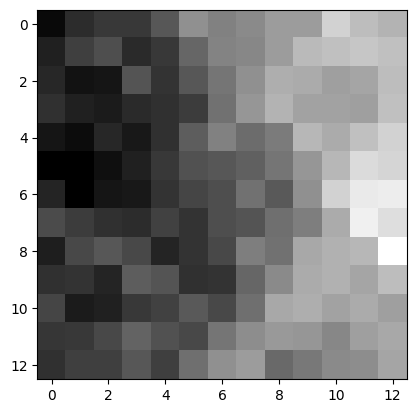

In [57]:
# load a sample image
# img = cv.imread("7334765991908007.jpg",cv.CV2)
## if you want to upload your own image to Google Colab
from google.colab import files
img = skimage.color.rgb2gray(io.imread(list(files.upload().keys())[0]))

# plot
plt.imshow(img, cmap='gray')
print(np.min(img),np.max(img),img.dtype)

(3, 2)


array([57., 60.,  0.])

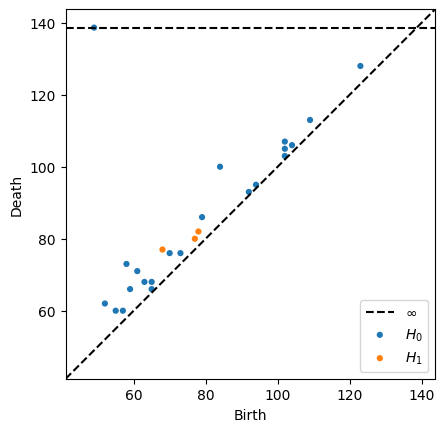

In [62]:
## compute persistence of the sublevel filtration
import math
import pandas as pad

pd = cripser.computePH(img,maxdim=1,location="birth")
pds = [pd[pd[:,0] == i] for i in range(2)]
t = persim.plot_diagrams([p[:,1:3] for p in pds])
pds0 = [pd[pd[:,0] == i] for i in range(1)]
# print(pd[pd[:,0] == 0])print(pd[pd[:,0] == 0,1:3])
pds0_bd =np.array(pd[pd[:,0] == 0,1:3])
pds1_bd =np.array(pd[pd[:,0] == 1,1:3])

# print(clean_max(pds0_bd))
# persim.plot_diagrams(pds0_bd)
pds0_bd=np.clip(pds0_bd,0,255)
pds1_bd=np.clip(pds1_bd,0,255)
print(pds1_bd.shape)
# data = pad.DataFrame(pds0_bd)
# data.to_csv("test.csv")
# print(pds0_bd[pds0_bd[:,0]==np.inf])
# len(pds0[0][:,1:3])
# b d q
bdq=np.array(pd[:,[1,2,0]])
bdq=np.clip(bdq,0,255)
bdq[0]

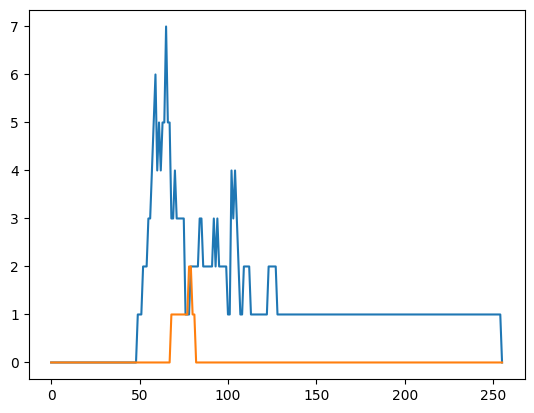

In [59]:
# calculate betti curve 
from gudhi import representations 
from gtda import diagrams
curves = representations.vector_methods.BettiCurve(256,sample_range = [0,255])
# # persim.plot_diagrams(curves)
result = curves(pds0_bd)
result1 = curves(pds1_bd)

plt.plot(result)
plt.plot(result1)

# print(result)
# pints = np.array([[i*1.,result[i]] for i in range(len(result))])
# persim.plot_diagrams(pints)
# gc = diagrams.BettiCurve(256)
# val = gc.fit_transform([bdq])
# print(val[0].shape)
# gc.plot(val)
# res = np.array([len(bdq),bdq,3])
# bdq.shape
# pints = np.array([[i*1.,val[0][0][i]] for i in range(len(val[0][0]))])
# persim.plot_diagrams(pints)

# gudhi.plot_persistence_barcode(pds1_bd)

[57. 60.  0.]
[55. 60.  0.]
[52. 62.  0.]
[59. 66.  0.]
[65. 66.  0.]
[63. 68.  0.]
[65. 68.  0.]
[61. 71.  0.]
[58. 73.  0.]
[73. 76.  0.]
[70. 76.  0.]
[79. 86.  0.]
[92. 93.  0.]
[94. 95.  0.]
[ 84. 100.   0.]
[102. 103.   0.]
[102. 105.   0.]
[104. 106.   0.]
[102. 107.   0.]
[109. 113.   0.]
[123. 128.   0.]
[ 49. 255.   0.]
[78. 82.  1.]
[77. 80.  1.]
[68. 77.  1.]


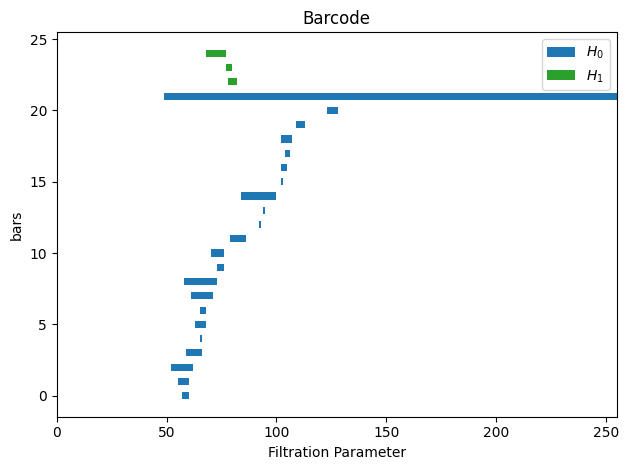

In [60]:
def barcode(ax, values):
#     category_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, data.shape[1]))
    values = np.asarray(values)
    colors = ["tab:blue",'tab:green']
    labels_drawn = []
    for i, x in enumerate(values):
      print(x)
      width = x[1]-x[0]
      start = x[0]
      dim = x[2].astype(int);
      label = '$H_{'+dim.astype(str)+"}$"
      rects = ax.barh(i, width, left=start, label=label if label not in labels_drawn else '', height=0.5, color=colors[dim])
      if(label not in labels_drawn):
            labels_drawn.append(label)



fig, ax = plt.subplots()
barcode(ax, bdq)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Filtration Parameter')
ax.set_ylabel('bars')
# ax.set_ylim(0, 10)
ax.axis(xmin=0,xmax=255)
ax.set_title('Barcode')
ax.legend()

fig.tight_layout()
plt.show()

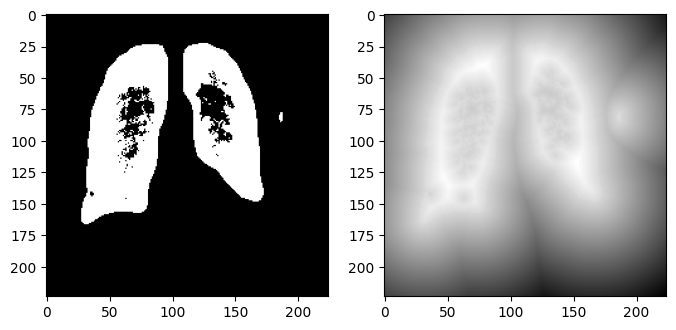

In [ ]:
from scipy.ndimage.morphology import distance_transform_edt
from skimage.filters import threshold_otsu
bw_img = (img >= threshold_otsu(img))
dt_img = distance_transform_edt(bw_img)-distance_transform_edt(~bw_img)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.imshow(bw_img,cmap='gray')
ax = fig.add_subplot(122)
ax.imshow(dt_img, cmap='gray')

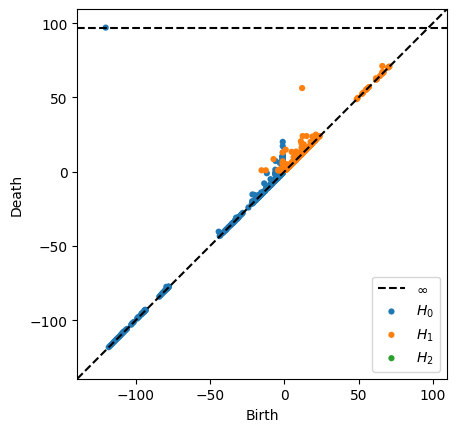

In [ ]:
# compute persistence of the distance transform
pd = cripser.computePH(dt_img,maxdim=1,location="birth")
pds = [pd[pd[:,0] == i] for i in range(3)]
persim.plot_diagrams([p[:,1:3] for p in pds])